In [92]:
import pandas as pd

In [93]:
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [94]:
bitcoin = bitcoin.iloc[:,[2,4,7]]
bitcoin.drop(range(28), inplace=True)
bitcoin.columns = ['Date', 'Open', 'Close']
bitcoin['Trend'] = bitcoin['Open']-bitcoin['Close']
bitcoin

,Date,Open,Close,Trend
28,20150201,218.67,228.99,-10.32
29,20150202,228.39,237.83,-9.44
30,20150203,237.01,228.58,8.43
31,20150204,228.77,227.11,1.66
32,20150205,227.11,216.76,10.35
...,...,...,...,...
2985,20230312,20619.34,22219.08,-1599.74
2986,20230313,22216.02,24220.00,-2003.98
2987,20230314,24220.00,24762.65,-542.65
2988,20230315,24761.61,24377.16,384.45


In [106]:

smp500['Trend'] = smp500['Open']-smp500['Close']
smp500 = smp500.iloc[36839:38903]
smp500 = smp500.loc[['Trend', 'Open', 'Close']]
smp500

KeyError: "['Trend' 'Open' 'Close'] not in index"

<AxesSubplot: >

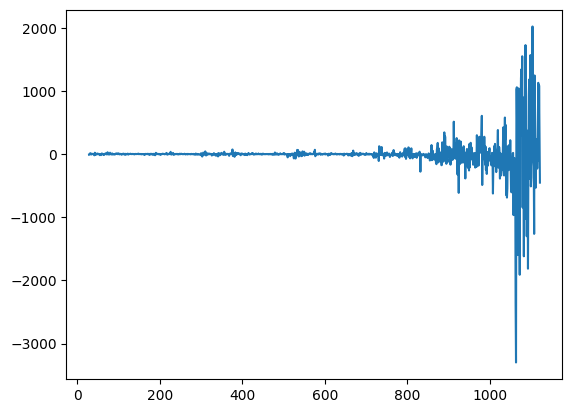

In [96]:
bitcoin.iloc[0:365*3]['Trend'].plot()

<AxesSubplot: >

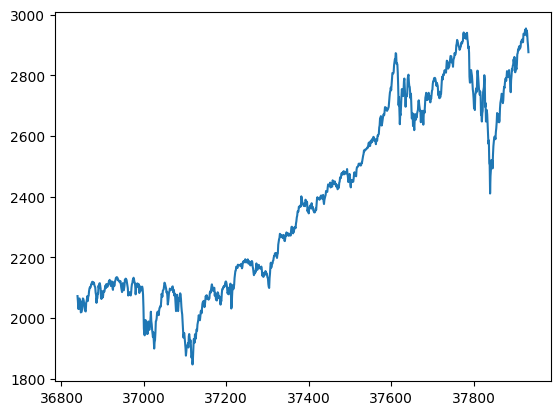

In [97]:
smp500.iloc[0:365*3]['High'].plot()

In [98]:

smp500['Date'] =pd.to_datetime(smp500['Date'])
smp500['Date']


36839   2015-01-02
36840   2015-01-05
36841   2015-01-06
36842   2015-01-07
36843   2015-01-08
           ...    
38898   2023-03-09
38899   2023-03-10
38900   2023-03-13
38901   2023-03-14
38902   2023-03-15
Name: Date, Length: 2064, dtype: datetime64[ns]

In [99]:
smp500.index=smp500['Date']
smp500.head()

,Date,Open,High,Low,Close,Volume,Trend
Date,,,,,,,
2015-01-02,2015-01-02,2058.90,2072.36,2046.04,2058.20,1.504833e+09,0.70
2015-01-05,2015-01-05,2054.44,2054.44,2017.34,2020.58,2.110622e+09,33.86
2015-01-06,2015-01-06,2022.15,2030.25,1992.44,2002.61,2.477839e+09,19.54
2015-01-07,2015-01-07,2005.55,2029.61,2005.55,2025.90,2.114156e+09,-20.35
2015-01-08,2015-01-08,2030.61,2064.08,2030.61,2062.14,2.185561e+09,-31.53


In [100]:
smp500['Year']=smp500.index.year
smp500['Mon']=smp500.index.month
smp500['Day']=smp500.index.day
dates=smp500[['Year','Mon','Day']]

smp500.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
smp500

Date     Open     High      Low    Close        Volume  \
Year Mon Day                                                                
2015 1   2   2015-01-02  2058.90  2072.36  2046.04  2058.20  1.504833e+09   
         5   2015-01-05  2054.44  2054.44  2017.34  2020.58  2.110622e+09   
         6   2015-01-06  2022.15  2030.25  1992.44  2002.61  2.477839e+09   
         7   2015-01-07  2005.55  2029.61  2005.55  2025.90  2.114156e+09   
         8   2015-01-08  2030.61  2064.08  2030.61  2062.14  2.185561e+09   
...                 ...      ...      ...      ...      ...           ...   
2023 3   9   2023-03-09  3998.66  4017.81  3908.70  3918.32  2.610567e+09   
         10  2023-03-10  3912.77  3934.05  3846.32  3861.59  3.224150e+09   
         13  2023-03-13  3835.12  3905.05  3808.86  3855.76  3.998506e+09   
         14  2023-03-14  3894.01  3937.29  3873.63  3919.29  3.434042e+09   
         15  2023-03-15  3876.74  3894.26  3838.24  3891.93  3.690103e+09   

              Trend  Year  Mon  Day  
Year Mon Day                         
2015 1   2     0.70  2015    1    2  
         5    33.86  2015    1    5  
         6    19.54  2015    1    6  
         7   -20.35  2015    1    7  
         8   -31.53  2015    1    8  
...             ...   ...  ...  ...  
2023 3   9    80.34  2023    3    9  
         10   51.18  2023    3   10  
         13  -20.64  2023    3   13  
         14  -25.28  2023    3   14  
         15  -15.19  2023    3   15  

[2064 rows x 10 columns]

In [101]:
year_day_mean=smp500.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()


C:\Users\goldme\AppData\Local\Temp\ipykernel_6512\3394390157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=smp500.groupby(level=[0,1]).mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2015,2043.618500,2086.168947,2090.510000,2102.731905,2119.615000,2109.400455,2102.516818,2058.501905,1962.428095,2030.578636,2089.545500,2067.892273
2016,1939.557895,1917.261000,2027.080000,2083.424762,2073.309524,2093.831818,2153.438500,2182.671739,2166.813333,2151.324286,2171.841429,2253.583333
2017,2279.364500,2332.785263,2373.939130,2367.174737,2399.505000,2440.374091,2458.224000,2463.660870,2496.208000,2560.427727,2597.430000,2672.390000
2018,2796.423810,2736.109474,2725.321429,2673.056190,2710.029545,2764.362857,2800.544286,2864.491739,2909.996842,2812.884348,2739.010476,2603.922105
2019,2617.177143,2761.412632,2815.765714,2908.761905,2870.230909,2900.743500,3003.907727,2917.818636,2992.096000,2990.413043,3109.390000,3183.954286


In [102]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.995319,0.969104,0.955869,0.947502,0.935448,0.917886,0.945844,0.902103,0.879997,0.881096,0.861853
Feb,0.995319,1.000000,0.974218,0.965926,0.965029,0.957485,0.943442,0.963869,0.927644,0.910618,0.913638,0.897209
Mar,0.969104,0.974218,1.000000,0.996396,0.977971,0.951850,0.935005,0.943574,0.904436,0.880354,0.883775,0.857932
Apr,0.955869,0.965926,0.996396,1.000000,0.989130,0.967781,0.954965,0.958764,0.925418,0.905849,0.911433,0.889346
May,0.947502,0.965029,0.977971,0.989130,1.000000,0.993893,0.987241,0.986684,0.968350,0.956395,0.959014,0.938973
Jun,0.935448,0.957485,0.951850,0.967781,0.993893,1.000000,0.998235,0.996368,0.989079,0.982283,0.982664,0.966129
Jul,0.917886,0.943442,0.935005,0.954965,0.987241,0.998235,1.000000,0.994953,0.994263,0.989673,0.989805,0.975645
Aug,0.945844,0.963869,0.943574,0.958764,0.986684,0.996368,0.994953,1.000000,0.991359,0.983789,0.983028,0.969191
Sep,0.902103,0.927644,0.904436,0.925418,0.968350,0.989079,0.994263,0.991359,1.000000,0.996793,0.992239,0.980067
Oct,0.879997,0.910618,0.880354,0.905849,0.956395,0.982283,0.989673,0.983789,0.996793,1.000000,0.997712,0.989860


([<matplotlib.axis.YTick at 0x27ea0f5b880>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

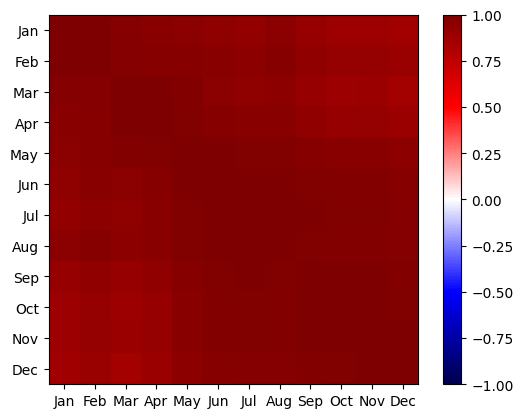

In [103]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

In [104]:
year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()

corr=mon_mean.corr()
corr

year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['High']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()

import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns);

ValueError: multiple levels only valid with MultiIndex